In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 비만의 환경적 요인
1. 비만: 비만 상태가 계속되면 인슐린이 혈당을 잘 낮추지 못하고, 췌장의 인슐린 분비능도 떨어져 당뇨병이 생긴다


2. 노화: 당뇨병은 중년 이후에 많이 발생하며, 연령이 높아질 수록 발병률이 높아진다.
3. 식생활: 탄수화물과 지방을 과다 섭취하면 체중이 늘고 당뇨병이 생긴다.
4. 운동 부족: 비만을 초래하고, 근육을 약화시키며, 저항력이 떨어진다.
5. 스트레스: 부신피질호르몬 분비를 늘린다.
6. 임신성 당뇨병: 4kg 이상의 아이를 출산한 병력이 있으면 임신성 당뇨병이 생길 가능성이 있다.
7. 고혈압: 보통 당뇨병과 동반된다.
8. 이상지질혈증: 보통 당뇨병과 동반된다. 고콜레스테롤혈증, 고중성지방혈증

#### diabetes _ 012 _ health _ indicators _ BRFSS2015.csv 
-235,680개의 data.

-0은 당뇨 없음 or 임산부, 1은 당뇨 전단계, 2는 당뇨.

-Feature 21개, 데이터 불균형 있음

#### diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv 
-70,692개의 data.

-0은 당뇨 없음, 1은 당뇨.

-Feature 21개, 데이터 불균형 없음

#### diabetes _ binary _ health _ indicators _ BRFSS2015.csv
-235,680개의 data. 

-0은 당뇨 없음, 1은 당뇨.

-Feature 21개, 데이터 불균형 있음

In [3]:
data = pd.read_csv('/content/drive/MyDrive/skku_ai/개인프로젝트/당뇨/Data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
df = pd.DataFrame(data)
# df['Age'] = df.apply(lambda x: 18 if x.Age == 1 else (x.Age*5+15), axis=1)

In [5]:
col_names = df.columns
col_names

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## 주목해야할 Column

1. HighPB: 당뇨와 함께 나타나는 대표적인 질병

2. HighChol: 이상지질혈증

3. BMI: 당뇨병의 대표적인 원인

4. Smoker: 흡연이 당뇨의 원인은 아니다. 따라서 당뇨 예측에는 고려하지 않는다.

5. Stroke: 당뇨병 대표 합병증. 뇌졸중을 겪고나서 당뇨병임을 아는 경우도 있다고 한다.

6. HeartDiseaseorAttack: Stroke와 마찬가지.

7. PhysActivity: 신체적 활동은 당뇨병 예방 및 치료에 가장 중요한 요인 중 하나.

8. Fruits: 탄수화물 섭취가 많으면 당뇨에 걸릴 가능성이 높아진다.

9. Age: 중년 이후 당뇨병에 걸릴 확률이 높아진다.

In [6]:
p = 1 - (np.count_nonzero(df.iloc[:,0].to_numpy()) / df.iloc[:,0].to_numpy().shape[0])
print(f'Ratio of zero: {p*100} %')

Ratio of zero: 86.06669820245979 %


In [7]:
# for name in col_names:
#     M = max(df[name])
#     m = min(df[name])
#     df[name] = df.apply(lambda x: (x[name] - m)/(M-m), axis=1)
    

In [8]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### 선형 회귀 분석

In [9]:
def predict(weight, list_input):
    input = np.array(list_input, dtype=np.float32)
    result = round(np.dot(input,weight)[0])
    return result

In [33]:
y = df['Diabetes_binary'].to_numpy()
b = tf.Variable(tf.random.normal((y.shape[0],)), dtype= tf.float32)

for name in col_names[1:]:
    print(name)
    x = df[name].to_numpy().reshape(-1,1)
    x_trans = np.transpose(x)
    A = np.matmul(x_trans, x)
    B = np.matmul(x_trans, y.reshape(-1,1))
    bias = np.matmul(x_trans, b).reshape(-1,1)
    
    w = np.matmul(np.linalg.inv(A), B-bias)
    
    cnt = 0.0
    
    for idx, i in enumerate(x):
        y_out = predict(w, i)
        y_label = y[idx]
        if y_out == y_label:
            cnt += 1.0
            

    print(f'accuracy = {cnt/y.shape[0] * 100} %, weight = {w[0][0]}, bias = {bias[0][0]}')    

HighBP
accuracy = 86.06669820245979 %, weight = 0.24460722078924732, bias = -16.359231272994293
HighChol
accuracy = 86.06669820245979 %, weight = 0.22333181021250217, bias = -342.4927925733191
CholCheck
accuracy = 86.06669820245979 %, weight = 0.1452201729146638, bias = -359.2184274900475
BMI
accuracy = 86.06196783349101 %, weight = 0.005271944027486884, bias = -6660.279838379275
Smoker
accuracy = 86.06669820245979 %, weight = 0.16413236504225376, bias = -135.25287514529555
Stroke
accuracy = 86.06669820245979 %, weight = 0.32223878053731214, bias = -48.481529290016624
HeartDiseaseorAttack
accuracy = 86.06669820245979 %, weight = 0.3307645555881531, bias = -24.95752666774206
PhysActivity
accuracy = 86.06669820245979 %, weight = 0.11761220413124669, bias = -285.13421686886625
Fruits
accuracy = 86.06669820245979 %, weight = 0.1301883461770013, bias = -254.0445231871604
Veggies
accuracy = 86.06669820245979 %, weight = 0.1317181105400959, bias = -376.98759168388017
HvyAlcoholConsump
accurac

In [11]:
x = df.iloc[:,1:].to_numpy().astype(np.float32)
y = df['Diabetes_binary'].to_numpy().astype(np.float32)

In [12]:
x.shape, y.shape

((253680, 21), (253680,))

In [13]:
xt = np.transpose(x)
A = np.matmul(xt,x)
B = np.matmul(xt,y.reshape(-1,1))
bias = np.matmul(xt,b).reshape(-1,1)
# print(bias.shape)
w = np.matmul(np.linalg.inv(A),B-bias)

cnt = 0.0

for idx, i in enumerate(x):
    y_out = predict(w, i)
    y_label = y[idx]
    if y_out == y_label:
        cnt += 1.0
        
for idx, i in enumerate(w):
    print(col_names[idx+1] + ' weight:', i[0])        

print(f"accuracy: {cnt/y.shape[0] * 100} %")

HighBP weight: 0.079718456
HighChol weight: 0.0639373
CholCheck weight: -0.015613735
BMI weight: 0.00532485
Smoker weight: -0.00575721
Stroke weight: 0.04175163
HeartDiseaseorAttack weight: 0.06442179
PhysActivity weight: -0.012691278
Fruits weight: -0.012721488
Veggies weight: -0.0074084476
HvyAlcoholConsump weight: -0.06282365
AnyHealthcare weight: -0.037790984
NoDocbcCost weight: -0.018819362
GenHlth weight: 0.03597925
MentHlth weight: -0.000850847
PhysHlth weight: 3.3237506e-05
DiffWalk weight: 0.044186354
Sex weight: 0.007085219
Age weight: 0.0054037827
Education weight: -0.017697006
Income weight: -0.008418202
accuracy: 86.2365972879218 %


### Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((228312, 21), (25368, 21), (228312,), (25368,))

In [15]:
model1 = LogisticRegression(max_iter=100)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

print( f'총 테스트 개수: {len(y_test)}, 오류개수: {(y_test != y_pred).sum()}')
print( f'정확도: {accuracy_score(y_test, y_pred)}' )

총 테스트 개수: 25368, 오류개수: 3590
정확도: 0.858483128350678


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
y_pred = model1.predict(x_train)

print( f'총 테스트 개수: {len(y_train)}, 오류개수: {(y_train != y_pred).sum()}')
print( f'정확도: {accuracy_score(y_train, y_pred)}' )

총 테스트 개수: 228312, 오류개수: 31324
정확도: 0.862801780020323


In [17]:
train_dataset = df.sample(frac=0.8, random_state=1)
len(train_dataset)

202944

In [18]:
test_dataset = df.drop(train_dataset.index)
len(test_dataset)

50736

In [19]:
len(train_dataset) + len(test_dataset) #253680

253680

In [20]:
x_train, y_train = train_dataset.iloc[:,1:], train_dataset.iloc[:,0]
x_test, y_test = test_dataset.iloc[:,1:], test_dataset.iloc[:,0]

In [21]:
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In [22]:
class Normalize(tf.Module):
  def __init__(self, x):
    self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
    self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

  def norm(self,x):
    return (x - self.mean)/self.std
  
  def unnorm(self, x):
    return (x * self.std) + self.mean

norm_x = Normalize(x_train)
x_train_norm , x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)

In [23]:
x_test_norm, x_train_norm

(<tf.Tensor: shape=(50736, 21), dtype=float32, numpy=
 array([[ 1.1546186 ,  1.164266  ,  0.19579816, ...,  0.318296  ,
         -1.0636344 , -1.4747685 ],
        [ 1.1546186 ,  1.164266  ,  0.19579816, ...,  0.64566904,
          0.96271837,  0.93963236],
        [ 1.1546186 ,  1.164266  ,  0.19579816, ...,  0.97304213,
         -1.0636344 , -0.99188834],
        ...,
        [ 1.1546186 ,  1.164266  ,  0.19579816, ...,  1.6277883 ,
          0.96271837, -0.99188834],
        [-0.86608595, -0.8589113 ,  0.19579816, ..., -1.9733156 ,
         -0.05045803, -1.9576488 ],
        [ 1.1546186 , -0.8589113 ,  0.19579816, ..., -0.3364502 ,
         -0.05045803, -2.4405289 ]], dtype=float32)>,
 <tf.Tensor: shape=(202944, 21), dtype=float32, numpy=
 array([[ 1.1546186 , -0.8589113 ,  0.19579816, ...,  1.6277883 ,
          0.96271837, -0.02612798],
        [-0.86608595, -0.8589113 ,  0.19579816, ...,  0.318296  ,
          0.96271837,  0.93963236],
        [ 1.1546186 ,  1.164266  ,  0.195798

In [24]:
def log_loss(y_p, y):
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_p)
  return tf.reduce_mean(ce)

In [25]:
class Logistic(tf.Module):
  def __init__(self):
    self.built = False

  def __call__(self, x, train=True):
    if not self.built:

      rand_w = tf.random.uniform(shape=[x.shape[-1],1], seed = 22)
      rand_b = tf.random.uniform(shape=[], seed=22)
      self.w = tf.Variable(rand_w)
      self.b = tf.Variable(rand_b)
      self.built = True

    z = tf.add(tf.matmul(x, self.w), self.b)
    z = tf.squeeze(z, axis = 1)
    if train:
      return z
    
    return tf.sigmoid(z)

In [26]:
log_reg = Logistic()

In [27]:
def predict_class(y_p, thresh = 0.5):
  return tf.cast(y_p > thresh, tf.float32)

def accuracy(y_p, y):

  y_p = tf.math.sigmoid(y_p)
  y_pred_class = predict_class(y_p)
  check_equal = tf.cast(y_pred_class == y, tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

In [28]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)

In [29]:
# Set training parameters
epochs = 100
learning_rate = 0.005
train_losses, test_losses = [], []
train_accs, test_accs = [], []

# Set up the training loop and begin training
for epoch in range(epochs):
  batch_losses_train, batch_accs_train = [], []
  batch_losses_test, batch_accs_test = [], []

  # Iterate over the training data
  for x_batch, y_batch in train_dataset:
    # print(x_batch.shape, y_batch.shape)
    with tf.GradientTape() as tape:
      y_pred_batch = log_reg(x_batch)
      # print(y_pred_batch.shape)
      batch_loss = log_loss(y_pred_batch, y_batch)
    # print(predict_class(y_pred_batch), y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Update the parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, log_reg.variables)
    for g,v in zip(grads, log_reg.variables):
      v.assign_sub(learning_rate * g)
    # Keep track of batch-level training performance
    batch_losses_train.append(batch_loss)
    batch_accs_train.append(batch_acc)

  # Iterate over the testing data
  for x_batch, y_batch in test_dataset:
    y_pred_batch = log_reg(x_batch)
    batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance
    batch_losses_test.append(batch_loss)
    batch_accs_test.append(batch_acc)

  # Keep track of epoch-level model performance
  train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
  test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}, Train acc: {train_acc}, val_acc: {test_acc}")

Epoch: 0, Training log loss: 0.557, Train acc: 0.7705376744270325, val_acc: 0.8588101267814636
Epoch: 10, Training log loss: 0.319, Train acc: 0.8638737797737122, val_acc: 0.8621729016304016
Epoch: 20, Training log loss: 0.319, Train acc: 0.8639329075813293, val_acc: 0.8626260757446289
Epoch: 30, Training log loss: 0.319, Train acc: 0.8639575242996216, val_acc: 0.8623896837234497
Epoch: 40, Training log loss: 0.319, Train acc: 0.8636224865913391, val_acc: 0.862737774848938
Epoch: 50, Training log loss: 0.319, Train acc: 0.8638589978218079, val_acc: 0.8626852035522461
Epoch: 60, Training log loss: 0.319, Train acc: 0.8638983964920044, val_acc: 0.8625407218933105
Epoch: 70, Training log loss: 0.319, Train acc: 0.8637456893920898, val_acc: 0.8623961806297302
Epoch: 80, Training log loss: 0.319, Train acc: 0.86395263671875, val_acc: 0.8623173832893372
Epoch: 90, Training log loss: 0.319, Train acc: 0.8638935089111328, val_acc: 0.8623239994049072


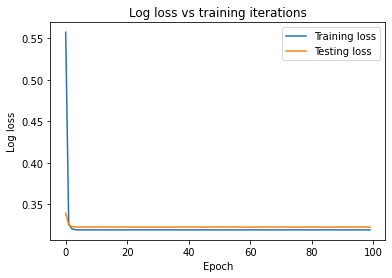

In [30]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

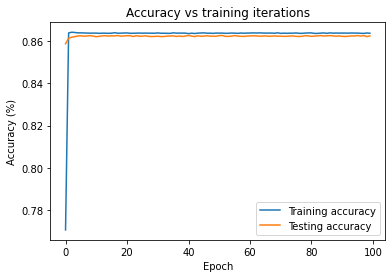

In [31]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");